> RoyChao

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set( style="ticks" )

df_dataset = pd.read_csv("data/1_dataset_elec.csv", index_col=0)
print(df_dataset.head())
print(df_dataset.info())

       date  supply  demand  industry    civil    OR
0  20210101   28487   25720   311.468  212.061  2936
1  20210102   28421   25485   304.952  207.625  3037
2  20210103   28513   25476   299.771  204.098  3032
3  20210104   32766   29734   342.273  233.036  3067
4  20210105   33117   30050   353.795  240.880  3102
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      395 non-null    int64  
 1   supply    395 non-null    int64  
 2   demand    395 non-null    int64  
 3   industry  395 non-null    float64
 4   civil     395 non-null    float64
 5   OR        395 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 21.6 KB
None


## 3-1 / (Training / Testing) & (X / Y) Set 

In [2]:
df_train = df_dataset.iloc[0:385]
df_test = df_dataset.iloc[385:395]

In [3]:
train_x = df_train.drop(columns=['OR', 'date'])
train_y = df_train['OR']

test_x = df_test.drop(columns=['OR', 'date'])
test_y = df_test['OR']

## 3-2 / Models 10++ : Regression

In [4]:
# We will try a lot of models later

from sklearn.model_selection import GridSearchCV                     
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVC, NuSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifiers = [
    KNeighborsRegressor(),
    SVR(),
    NuSVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor()
]

In [5]:
# 模型訓練

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍


train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度
best = []
avg = []

# train_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
# valid_index = [21, 22, 23, 24, 25, 26, 27, 28]

for clf in classifiers:
  for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤

    clf.fit(train_x_split, train_y_split)             # 訓練決策樹模型
    
    train_pred_y = clf.predict(train_x_split)         # 確認模型是否訓練成功
    train_acc = mean_squared_error(train_y_split, train_pred_y) / len(train_y_split)

    valid_pred_y = clf.predict(valid_x_split)         # 驗證模型是否訓練成功
    valid_acc = mean_squared_error(valid_y_split, valid_pred_y) / len(valid_y_split)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

  print( clf.__class__.__name__ )        # print classifier's name
    # print("train MSE: ", train_acc)
    # print("test MSE: ", valid_acc)
    
  print((
    'average train MSE: {}\n' +
    '    min train MSE: {}\n' +
    '    max train MSE: {}\n' +
    'average valid MSE: {}\n' +
    '    min valid MSE: {}\n' +
    '    max valid MSE: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
  ))

  best.append(np.min(valid_acc_list))
  avg.append(np.mean(valid_acc_list))

  print("="*30)

KNeighborsRegressor
average train MSE: 1306.7056621689999
    min train MSE: 1145.5820079271377
    max train MSE: 1419.0352179962897
average valid MSE: 8648.867617473434
    min valid MSE: 6927.519015010962
    max valid MSE: 11936.134322820037
SVR
average train MSE: 2175.290929116174
    min train MSE: 1145.5820079271377
    max train MSE: 3232.655997049323
average valid MSE: 10444.091668611032
    min valid MSE: 6927.519015010962
    max valid MSE: 16540.84114812267
NuSVR
average train MSE: 2379.993712352754
    min train MSE: 1145.5820079271377
    max train MSE: 3232.655997049323
average valid MSE: 10688.445538094242
    min valid MSE: 6927.519015010962
    max valid MSE: 16540.84114812267
DecisionTreeRegressor
average train MSE: 1784.9952842645653
    min train MSE: 0.0
    max train MSE: 3232.655997049323
average valid MSE: 11813.99920669937
    min valid MSE: 6927.519015010962
    max valid MSE: 24636.39635688986
RandomForestRegressor
average train MSE: 1482.2013437432427
    m

## 3-3 / Figures: Best Results

<AxesSubplot:>

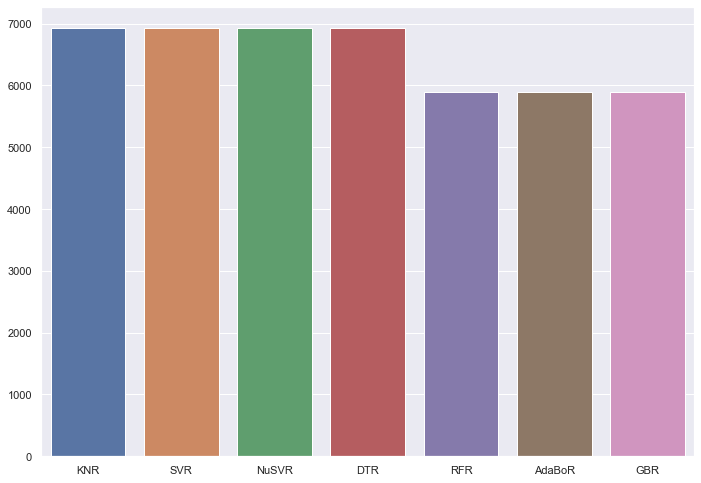

In [6]:
xx = ['KNR', 'SVR', 'NuSVR', 'DTR', 'RFR', 'AdaBoR', 'GBR']
yy = best
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=xx, y=yy)

## 3-4 / FIgures: Average Results

<AxesSubplot:>

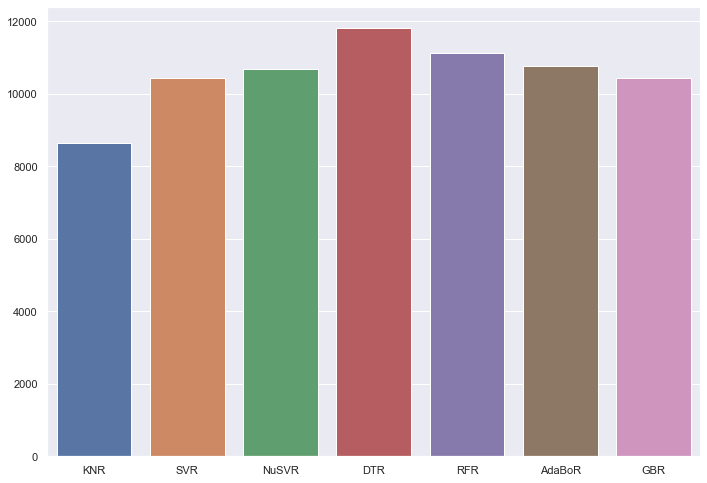

In [7]:
xx = ['KNR', 'SVR', 'NuSVR', 'DTR', 'RFR', 'AdaBoR', 'GBR']
yy = avg
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=xx, y=yy)

## 3-5 / Select Best Model

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
param_grid = {'learning_rate':[0.1, 0.01], 'n_estimators':[100], 'subsample':[1], 'max_depth':[3, 5, 7]}

# Split data into "trainning data", "testing data", and "validation data"
# cv = StratifiedShuffleSplit(n_splits=5, test_size=0.4, random_state=12)
# Try different model parameters
grid = GridSearchCV(GradientBoostingRegressor(), param_grid, verbose=5, n_jobs=-1)
# Train model
grid.fit(train_x, train_y)

grid.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1;, score=-6.049 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1;, score=-3.698 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1;, score=-0.043 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1;, score=0.218 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1;, score=-0.121 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1;, score=-4.627 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1;, score=-0.063 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1;, score=-0.256 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=100, subsam

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1}

In [9]:
# 模型訓練

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具
from sklearn.metrics import mean_squared_error, mean_absolute_error

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍


train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度
best = []
avg = []

# train_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
# valid_index = [21, 22, 23, 24, 25, 26, 27, 28]
clf = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1)

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
  train_x_split = train_x.iloc[train_index]         # 產生訓練資料
  train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
  valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
  valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤

  clf.fit(train_x_split, train_y_split)             # 訓練決策樹模型
  
  train_pred_y = clf.predict(train_x_split)         # 確認模型是否訓練成功
  train_acc = mean_squared_error(train_y_split, train_pred_y) / len(train_y_split)

  valid_pred_y = clf.predict(valid_x_split)         # 驗證模型是否訓練成功
  valid_acc = mean_squared_error(valid_y_split, valid_pred_y) / len(valid_y_split)
  
  train_acc_list.append(train_acc)
  valid_acc_list.append(valid_acc)

print( clf.__class__.__name__ )        # print classifier's name
  # print("train MSE: ", train_acc)
  # print("test MSE: ", valid_acc)
  
print((
  'average train MSE: {}\n' +
  '    min train MSE: {}\n' +
  '    max train MSE: {}\n' +
  'average valid MSE: {}\n' +
  '    min valid MSE: {}\n' +
  '    max valid MSE: {}').format(
  np.mean(train_acc_list),                          # 輸出平均訓練準確度
  np.min(train_acc_list),                           # 輸出最低訓練準確度
  np.max(train_acc_list),                           # 輸出最高訓練準確度
  np.mean(valid_acc_list),                          # 輸出平均驗證準確度
  np.min(valid_acc_list),                           # 輸出最低驗證準確度
  np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

best.append(np.min(valid_acc_list))
avg.append(np.mean(valid_acc_list))

print("="*30)

GradientBoostingRegressor
average train MSE: 412.7032140211697
    min train MSE: 340.41457061046407
    max train MSE: 477.277656670833
average valid MSE: 8458.41767034014
    min valid MSE: 6452.622856018412
    max valid MSE: 11081.877140592303


## 3-6 / Figures : Training Results

<AxesSubplot:>

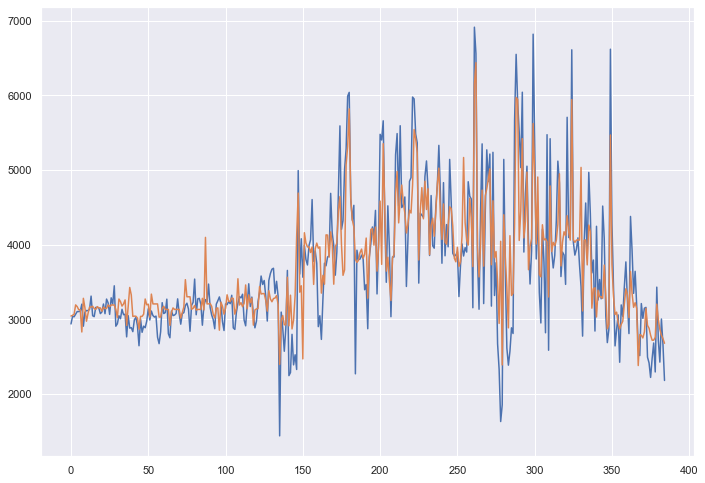

In [10]:
l = len(train_x)

x = np.arange(0, l)
y_true = []
y_pred = []

for idx in range( l ):
  # print( train_y[idx] )
  y_true.append( train_y[idx] )
  y_pred.append( clf.predict( train_x.iloc[idx].values.reshape(1, -1))[0] )
  # y_true = y_true.append( train_y[idx] )
  # y_pred = y_pred.append( clf.predict( train_x[idx] ) )

fig, ax = plt.subplots()
sns.lineplot(x=x, y=y_true, ax=ax)
sns.lineplot(x=x, y=y_pred, ax=ax)

## 3-7 / Figures : Testing Results

MSE: 52112.8532893767
MSE: 44.156697843992944


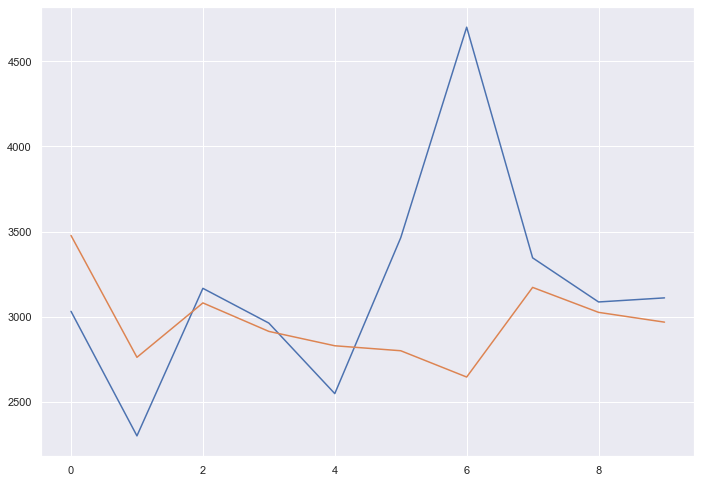

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

l = len(test_x)
x = np.arange(0, l)

y_true = []
y_pred = []

for idx in range( l ):
  # print( train_y[idx] )
  y_true.append( test_y.iloc[idx] )
  y_pred.append( clf.predict( test_x.iloc[idx].values.reshape(1, -1))[0] )
  # y_true = y_true.append( train_y[idx] )
  # y_pred = y_pred.append( clf.predict( train_x[idx] ) )

fig, ax = plt.subplots()
sns.lineplot(x=x, y=y_true, ax=ax)
sns.lineplot(x=x, y=y_pred, ax=ax)

print(f"MSE: {mean_squared_error(y_true, y_pred) / len(y_true)}") 
print(f"MAE: {mean_absolute_error(y_true, y_pred) / len(y_true)}") 